
## FutureCart Week -1 and Week-2

In [28]:
#installing seaborn
!pip install seaborn


In [295]:
#importing libraries and reading the datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load datasets
df_clicks = pd.read_csv('clicks.csv')         # Contains columns like 'Day Index', 'clicks'
df_impressions = pd.read_csv('impressions.csv')  # Contains columns like 'Day Index', 'impressions'
df_product = pd.read_csv('product.csv')       # Contains columns like 'Day Index', 'product'

In [296]:
#printing the first 5 records
df_clicks.head()

,Day Index,Clicks
0,01-12-2021,445
1,02-12-2021,433
2,03-12-2021,424
3,04-12-2021,427
4,05-12-2021,451


In [360]:
#printing the first 5 records
df_impressions.head()

,Day Index,Impressions
0,01-12-2021,620
1,02-12-2021,890
2,03-12-2021,851
3,04-12-2021,881
4,05-12-2021,678


In [361]:
#printing the first 5 records
df_product.head()

,Day Index,Quantity
0,01-12-2021,14
1,02-12-2021,10
2,03-12-2021,13
3,04-12-2021,22
4,05-12-2021,33


In [441]:
# First merge clicks and impressions on 'date'
merged_df = pd.merge(df_clicks, df_impressions, on='Day Index', how='left')

# Then merge the result with product on 'date'
final_df = pd.merge(merged_df, df_product, on='Day Index', how='left')
final_copy=final_df.copy()


In [363]:
#printing the first 5 records of the merged dataset
print(final_df.head())

    Day Index  Clicks  Impressions  Quantity
0  01-12-2021     445          620        14
1  02-12-2021     433          890        10
2  03-12-2021     424          851        13
3  04-12-2021     427          881        22
4  05-12-2021     451          678        33


In [442]:
#printing the first 5 records of the merged dataset
final_copy.head()

,Day Index,Clicks,Impressions,Quantity
0,01-12-2021,445,620,14
1,02-12-2021,433,890,10
2,03-12-2021,424,851,13
3,04-12-2021,427,881,22
4,05-12-2021,451,678,33


In [365]:
#info of dataset
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Day Index    212 non-null    object
 1   Clicks       212 non-null    int64 
 2   Impressions  212 non-null    int64 
 3   Quantity     212 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.8+ KB


In [366]:
#shape of dataset
final_df.shape

(212, 4)

In [367]:
#datatypes of dataset
final_df.dtypes

Day Index      object
Clicks          int64
Impressions     int64
Quantity        int64
dtype: object

In [368]:
# Convert 'Day Index' column to datetime format by specifying the format
final_df['Day Index'] = pd.to_datetime(final_df['Day Index'], format="%d-%m-%Y")
# Check the data types to confirm the conversion
print(final_df.dtypes)
print(final_df.head())

Day Index      datetime64[ns]
Clicks                  int64
Impressions             int64
Quantity                int64
dtype: object
   Day Index  Clicks  Impressions  Quantity
0 2021-12-01     445          620        14
1 2021-12-02     433          890        10
2 2021-12-03     424          851        13
3 2021-12-04     427          881        22
4 2021-12-05     451          678        33


In [369]:
#check for null values
final_df.isnull().sum()

Day Index      0
Clicks         0
Impressions    0
Quantity       0
dtype: int64

In [371]:
#describing data
final_df.describe()

,Day Index,Clicks,Impressions,Quantity
count,212,212.00000,212.000000,212.000000
mean,2022-03-16 12:00:00,358.20283,1531.702830,17.542453
min,2021-12-01 00:00:00,60.00000,620.000000,5.000000
25%,2022-01-22 18:00:00,154.00000,1209.750000,13.750000
50%,2022-03-16 12:00:00,402.50000,1460.000000,17.000000
75%,2022-05-08 06:00:00,492.75000,1862.000000,21.000000
max,2022-06-30 00:00:00,726.00000,2707.000000,38.000000
std,NaN,164.52160,440.660783,5.790423


In [373]:
#printing to see the data
print(final_df.columns)
print(final_df.head())
final_df.dtypes

Index(['Day Index', 'Clicks', 'Impressions', 'Quantity'], dtype='object')
   Day Index  Clicks  Impressions  Quantity
0 2021-12-01     445          620        14
1 2021-12-02     433          890        10
2 2021-12-03     424          851        13
3 2021-12-04     427          881        22
4 2021-12-05     451          678        33


Day Index      datetime64[ns]
Clicks                  int64
Impressions             int64
Quantity                int64
dtype: object

### Plots for daily clicks and daily impressions

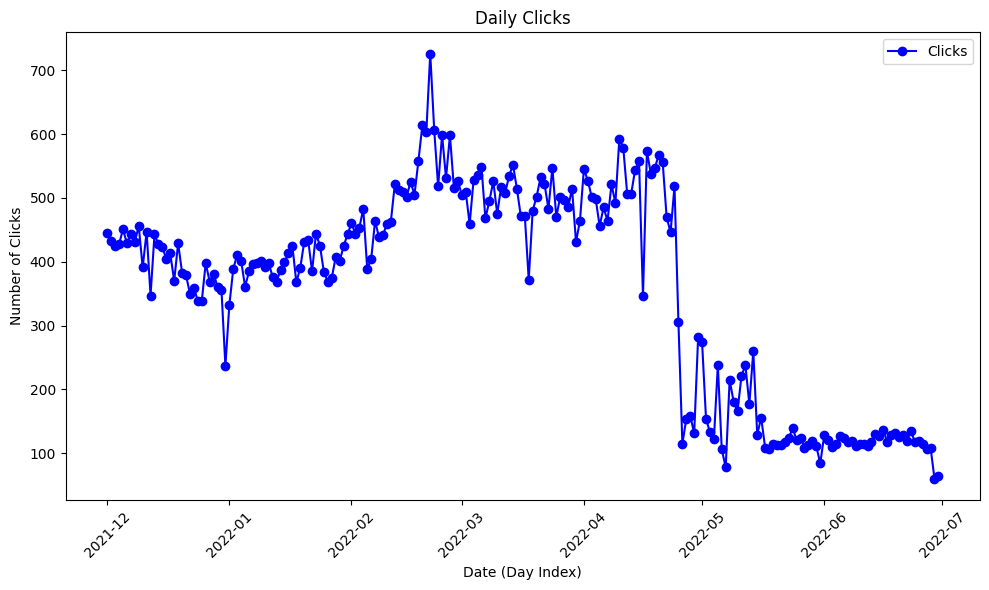

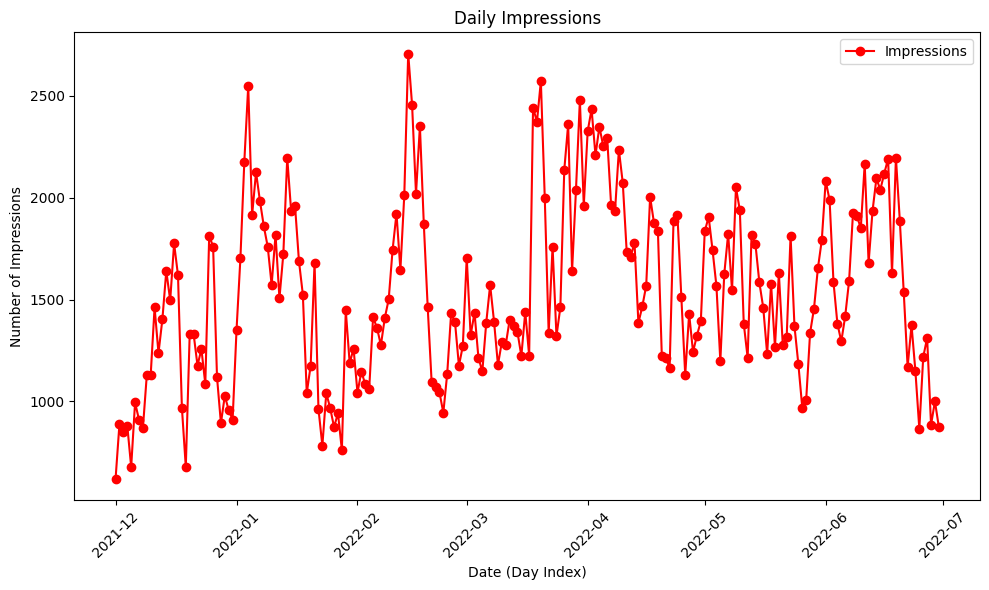

In [392]:
# Ensure 'Day Index' is in datetime format
final_df['Day Index'] = pd.to_datetime(final_df['Day Index'])

# Plotting daily clicks
plt.figure(figsize=(10,6))
plt.plot(final_df['Day Index'], final_df['Clicks'], marker='o', color='b', label='Clicks')
plt.title('Daily Clicks')
plt.xlabel('Date (Day Index)')
plt.ylabel('Number of Clicks')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting daily impressions
plt.figure(figsize=(10,6))
plt.plot(final_df['Day Index'], final_df['Impressions'], marker='o', color='r', label='Impressions')
plt.title('Daily Impressions')
plt.xlabel('Date (Day Index)')
plt.ylabel('Number of Impressions')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


### Monthly clicks and impressions 

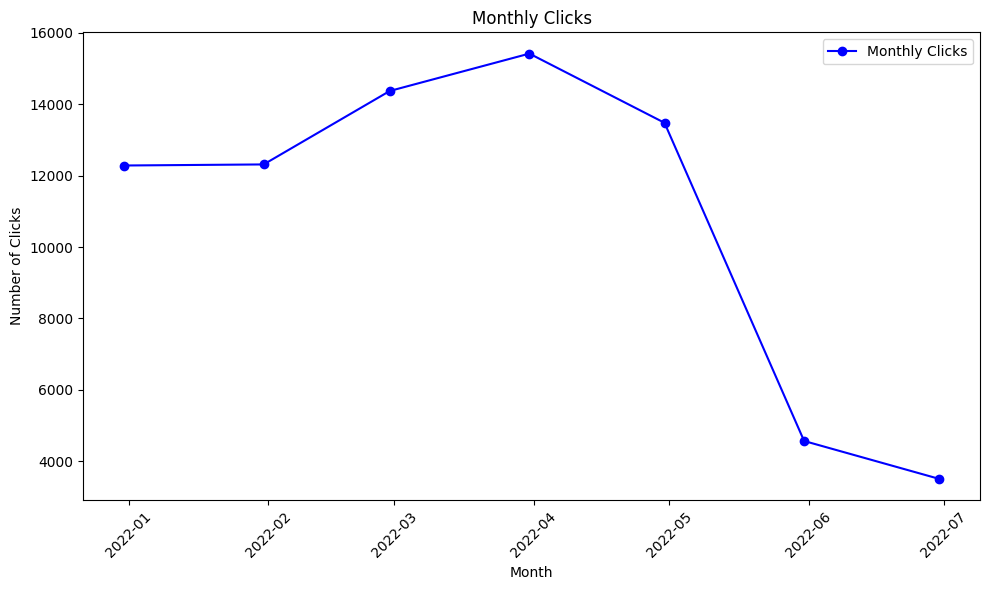

In [396]:
# Resampling to get monthly data (monthly sums)
monthly_df = final_df.resample('M').sum()

# Plotting monthly clicks
plt.figure(figsize=(10,6))
plt.plot(monthly_df.index, monthly_df['Clicks'], marker='o', color='b', label='Monthly Clicks')
plt.title('Monthly Clicks')
plt.xlabel('Month')
plt.ylabel('Number of Clicks')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

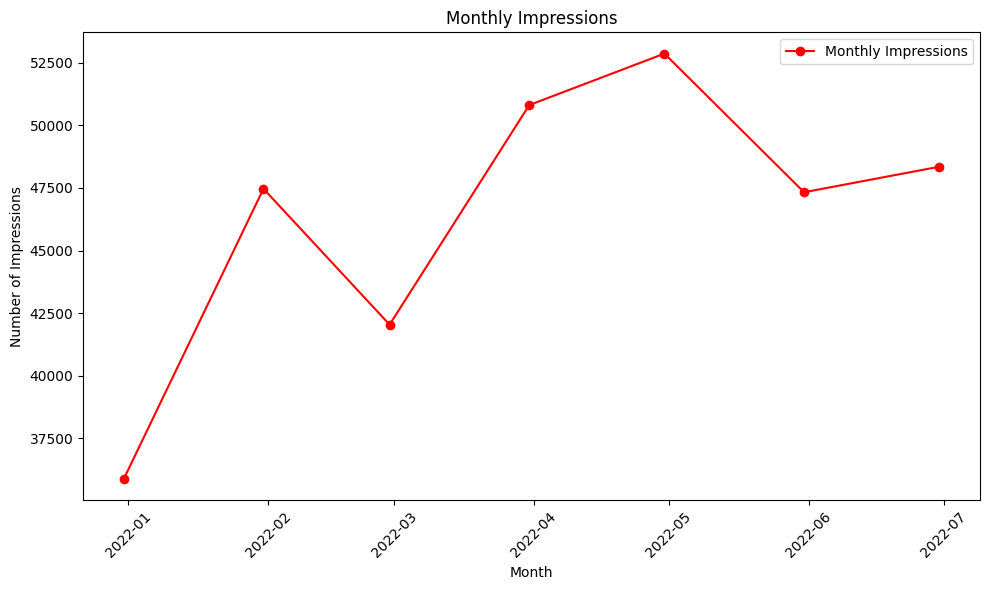

In [397]:
# Plotting monthly impressions
plt.figure(figsize=(10,6))
plt.plot(monthly_df.index, monthly_df['Impressions'], marker='o', color='r', label='Monthly Impressions')
plt.title('Monthly Impressions')
plt.xlabel('Month')
plt.ylabel('Number of Impressions')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


### Plotting box plot for outliers

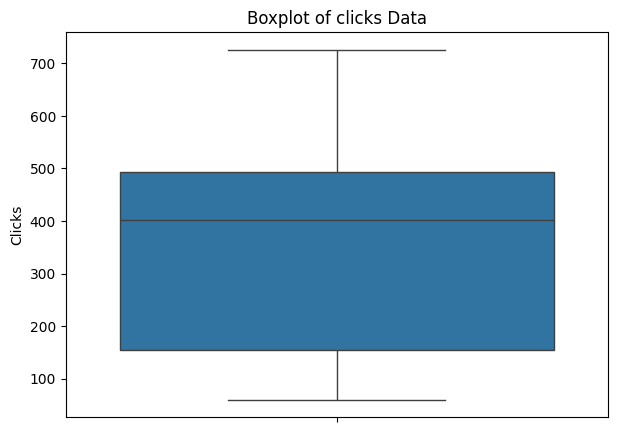

In [398]:
# Box Plot of Clicks column
plt.figure(figsize=(7, 5))
sns.boxplot(final_df['Clicks'])
plt.title('Boxplot of clicks Data')
plt.show()


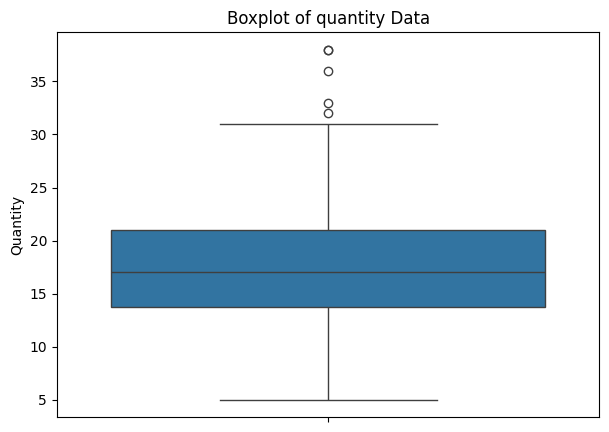

In [399]:
# Box Plot of Quantity column
plt.figure(figsize=(7, 5))
sns.boxplot(final_df['Quantity'])
plt.title('Boxplot of quantity Data')
plt.show()

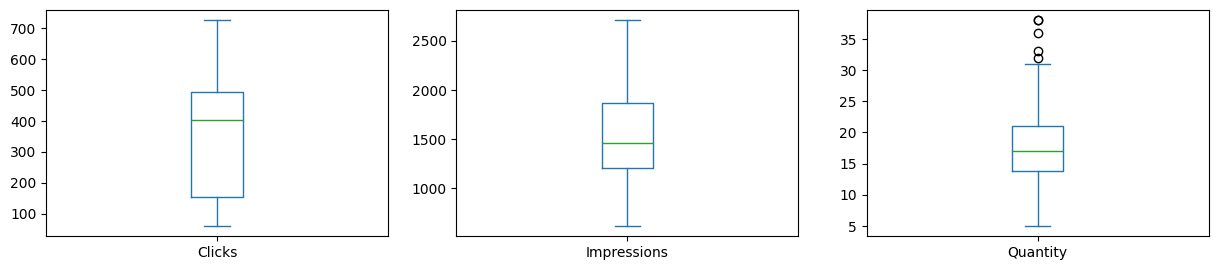

In [400]:
#box plots of the columns in the dataset
final_df.plot(kind='box', subplots=True, layout=(3, 3), figsize=(15, 10), sharex=False, sharey=False)
plt.show()


### Outlier treatment using Inter Quartile Range

In [401]:
#getting the number of outliers in each column 
def count_outliers(column):
    Q1 = column.quantile(0.25)  # First quartile (25th percentile)
    Q3 = column.quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1              # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Count outliers below the lower bound or above the upper bound
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return len(outliers)

# Apply the function to numeric columns in the DataFrame
numeric_columns = final_df.select_dtypes(include=['number'])
outlier_counts = numeric_columns.apply(count_outliers)

# Display the result
print("Number of outliers in each column:")
print(outlier_counts)

Number of outliers in each column:
Clicks         0
Impressions    0
Quantity       5
dtype: int64


In [402]:
# Function to detect outliers and return the records
def get_outlier_records(column):
    Q1 = column.quantile(0.25)  # First quartile (25th percentile)
    Q3 = column.quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1              # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Identify rows where the value is an outlier
    return final_df[(column < lower_bound) | (column > upper_bound)]

# Apply to numeric columns and collect outlier records
numeric_columns = final_df.select_dtypes(include=['number'])
outlier_records = {}

for col in numeric_columns.columns:
    outlier_records[col] = get_outlier_records(final_df[col])

# Display the outlier records for each column
for col, records in outlier_records.items():
    print(f"Outliers in column '{col}':")
    print(records)
    print("\n")


Outliers in column 'Clicks':
Empty DataFrame
Columns: [Clicks, Impressions, Quantity]
Index: []


Outliers in column 'Impressions':
Empty DataFrame
Columns: [Clicks, Impressions, Quantity]
Index: []


Outliers in column 'Quantity':
            Clicks  Impressions  Quantity
Day Index                                
2021-12-05     451          678        33
2021-12-10     391         1129        38
2022-02-17     505         2351        38
2022-03-24     547         1321        32
2022-04-22     470         1163        36




In [403]:
# Calculate the percentiles
q25 = np.percentile(final_df['Quantity'], 25)  # 25th percentile
q75 = np.percentile(final_df['Quantity'], 75)  # 75th percentile
q97 = np.percentile(final_df['Quantity'], 97)  # 97th percentile

# Define the lower and upper bounds for outliers 
lower_bound = q25
upper_bound = q75

# Replace values above the 97th percentile with the 97th percentile value
final_df['Quantity'] = final_df['Quantity'].apply(lambda x: q97 if x > upper_bound else x)
 
# Replace values below the 25th percentile with the 25th percentile value
final_df['Quantity'] = final_df['Quantity'].apply(lambda x: q25 if x < lower_bound else x)

# Check the updated DataFrame
print(final_df.head())


            Clicks  Impressions  Quantity
Day Index                                
2021-12-01     445          620     14.00
2021-12-02     433          890     13.75
2021-12-03     424          851     13.75
2021-12-04     427          881     30.67
2021-12-05     451          678     30.67


In [408]:
# If the index contains the 'Day Index' information, reset the index to make it a column
final_df.reset_index(inplace=True)

# This will add the datetime index as a 'index' column and you can rename it to 'Day Index'
final_df.rename(columns={'index': 'Day Index'}, inplace=True)

# Check the result
print(final_df.head())


   Day Index  Clicks  Impressions  Quantity
0 2021-12-01     445          620     14.00
1 2021-12-02     433          890     13.75
2 2021-12-03     424          851     13.75
3 2021-12-04     427          881     30.67
4 2021-12-05     451          678     30.67


In [409]:
#checking info
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Day Index    212 non-null    datetime64[ns]
 1   Clicks       212 non-null    int64         
 2   Impressions  212 non-null    int64         
 3   Quantity     212 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 6.8 KB


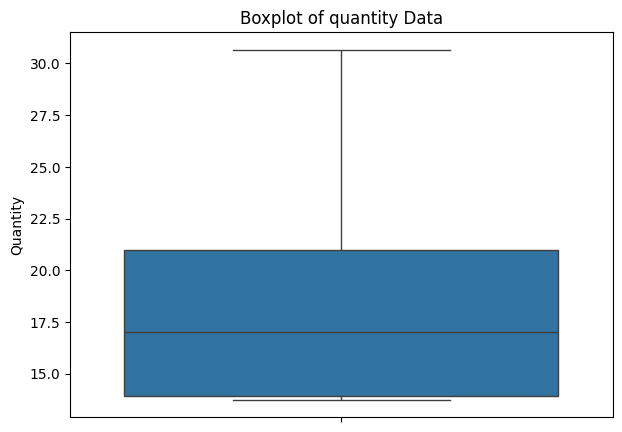

In [410]:
#box plot after outlier treatment
plt.figure(figsize=(7, 5))
sns.boxplot(final_df['Quantity'])
plt.title('Boxplot of quantity Data')
plt.show()

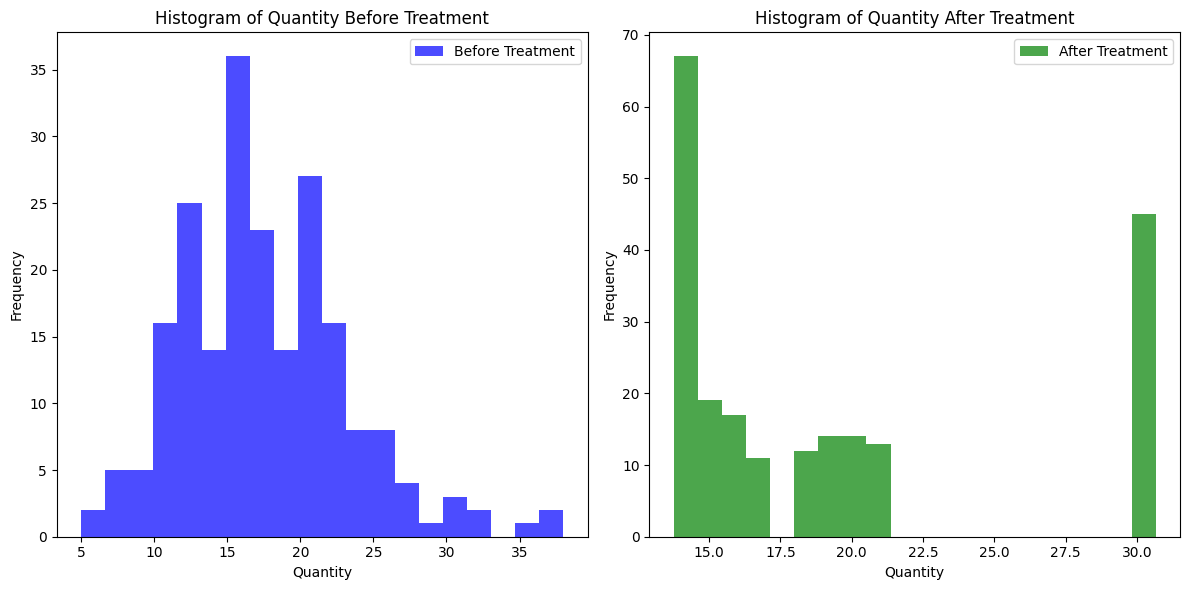

In [413]:
#Histogram before and after outlier analysis
column = 'Quantity'

plt.figure(figsize=(12, 6))

# Before treatment
plt.subplot(1, 2, 1)
plt.hist(numeric_columns[column], bins=20, color='blue', alpha=0.7, label='Before Treatment')
plt.title(f"Histogram of {column} Before Treatment")
plt.xlabel(column)
plt.ylabel('Frequency')
plt.legend()

# After treatment
plt.subplot(1, 2, 2)
plt.hist(final_df[column], bins=20, color='green', alpha=0.7, label='After Treatment')
plt.title(f"Histogram of {column} After Treatment")
plt.xlabel(column)
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


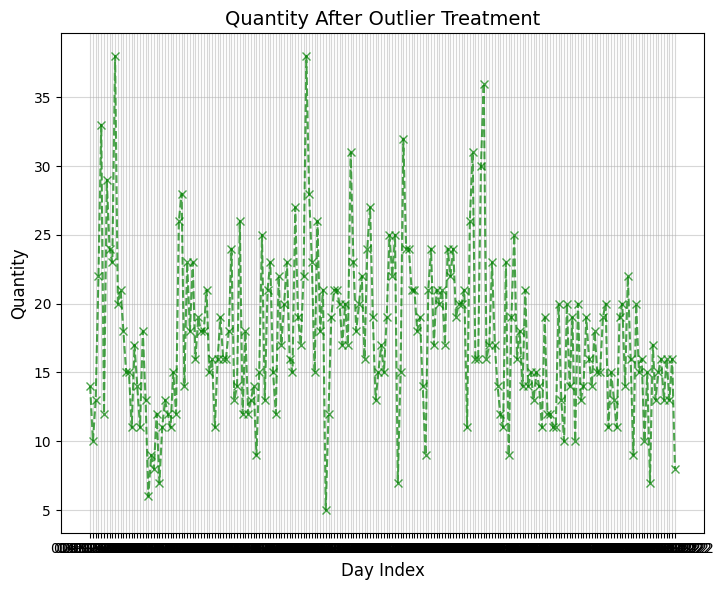

In [452]:
# Plot : After Outlier Treatment
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(final_df.index, final_df['Quantity'], color='green', linestyle='--', marker='x', alpha=0.7)
plt.title('Quantity After Outlier Treatment', fontsize=14)
plt.xlabel('Day Index', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


## Feature Engineering for day index column

In [421]:
# Create columns for each day of the week
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for i, day in enumerate(days_of_week):
    final_df[day] = (final_df['Day Index'].dt.dayofweek == i).astype(int)

# Display the updated DataFrame
print(final_df.head())


   Day Index  Clicks  Impressions  Quantity  Monday  Tuesday  Wednesday  \
0 2021-12-01     445          620     14.00       0        0          1   
1 2021-12-02     433          890     13.75       0        0          0   
2 2021-12-03     424          851     13.75       0        0          0   
3 2021-12-04     427          881     30.67       0        0          0   
4 2021-12-05     451          678     30.67       0        0          0   

   Thursday  Friday  Saturday  Sunday  
0         0       0         0       0  
1         1       0         0       0  
2         0       1         0       0  
3         0       0         1       0  
4         0       0         0       1  


In [422]:
#data types of dataset
final_df.dtypes

Day Index      datetime64[ns]
Clicks                  int64
Impressions             int64
Quantity              float64
Monday                  int32
Tuesday                 int32
Wednesday               int32
Thursday                int32
Friday                  int32
Saturday                int32
Sunday                  int32
dtype: object

In [425]:
# Ensure 'Day Index' is in datetime format
final_df['Day Index'] = pd.to_datetime(final_df['Day Index'])

# List of month names
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Create columns for each month name
for month in range(1, 13):
    month_name = month_names[month - 1]  # Get the month name (1 -> 'January', 2 -> 'February', etc.)
    final_df[month_name] = final_df['Day Index'].dt.month.apply(lambda x: 1 if x == month else 0)

# Check the updated DataFrame with month columns
print(final_df.head())


   Day Index  Clicks  Impressions  Quantity  Monday  Tuesday  Wednesday  \
0 2021-12-01     445          620     14.00       0        0          1   
1 2021-12-02     433          890     13.75       0        0          0   
2 2021-12-03     424          851     13.75       0        0          0   
3 2021-12-04     427          881     30.67       0        0          0   
4 2021-12-05     451          678     30.67       0        0          0   

   Thursday  Friday  Saturday  ...  March  April  May  June  July  August  \
0         0       0         0  ...      0      0    0     0     0       0   
1         1       0         0  ...      0      0    0     0     0       0   
2         0       1         0  ...      0      0    0     0     0       0   
3         0       0         1  ...      0      0    0     0     0       0   
4         0       0         0  ...      0      0    0     0     0       0   

   September  October  November  December  
0          0        0         0         1 

In [426]:
#printing 5 records of dataset
final_df.head()

,Day Index,Clicks,Impressions,Quantity,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,...,March,April,May,June,July,August,September,October,November,December
0,2021-12-01,445,620,14.00,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2021-12-02,433,890,13.75,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2021-12-03,424,851,13.75,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,2021-12-04,427,881,30.67,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,2021-12-05,451,678,30.67,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [427]:
# Ensure 'Day Index' is in datetime format
final_df['Day Index'] = pd.to_datetime(final_df['Day Index'])

# Creating a column for weekdays (1 for weekdays, 0 for weekends)
final_df['Weekday'] = final_df['Day Index'].dt.weekday.apply(lambda x: 1 if x < 5 else 0)

# Creating a column for weekends (1 for weekends, 0 for weekdays)
final_df['Weekend'] = final_df['Day Index'].dt.weekday.apply(lambda x: 1 if x >= 5 else 0)

# Check the updated DataFrame with weekday and weekend columns
print(final_df.head())


   Day Index  Clicks  Impressions  Quantity  Monday  Tuesday  Wednesday  \
0 2021-12-01     445          620     14.00       0        0          1   
1 2021-12-02     433          890     13.75       0        0          0   
2 2021-12-03     424          851     13.75       0        0          0   
3 2021-12-04     427          881     30.67       0        0          0   
4 2021-12-05     451          678     30.67       0        0          0   

   Thursday  Friday  Saturday  ...  May  June  July  August  September  \
0         0       0         0  ...    0     0     0       0          0   
1         1       0         0  ...    0     0     0       0          0   
2         0       1         0  ...    0     0     0       0          0   
3         0       0         1  ...    0     0     0       0          0   
4         0       0         0  ...    0     0     0       0          0   

   October  November  December  Weekday  Weekend  
0        0         0         1        1        0  
1 

In [428]:
#printing dataset
final_df.head()

,Day Index,Clicks,Impressions,Quantity,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,...,May,June,July,August,September,October,November,December,Weekday,Weekend
0,2021-12-01,445,620,14.00,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,2021-12-02,433,890,13.75,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
2,2021-12-03,424,851,13.75,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
3,2021-12-04,427,881,30.67,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
4,2021-12-05,451,678,30.67,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


## ScatterPlot for clicks vs quantity

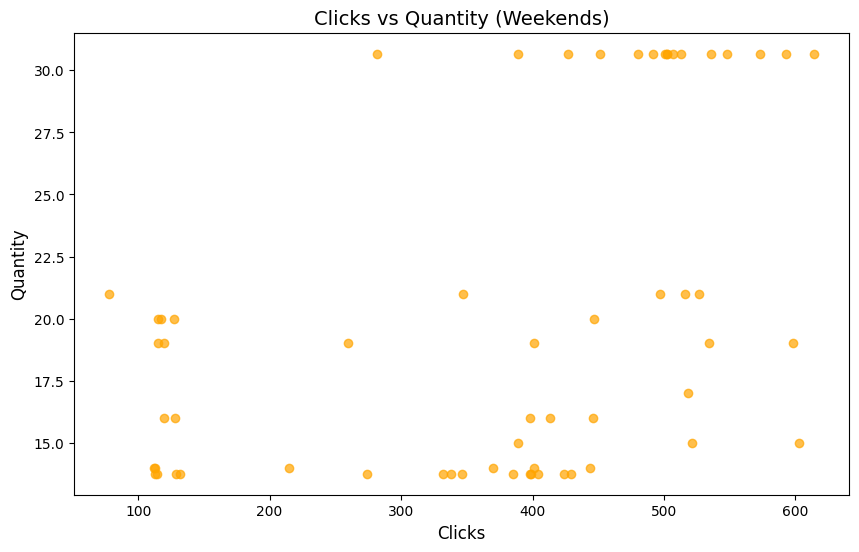

In [429]:
# Filter data for weekends (Weekend column = 1)
weekend_data = final_df[final_df['Weekend'] == 1]

# Create a scatter plot for Clicks vs Quantity on weekends
plt.figure(figsize=(10, 6))
plt.scatter(weekend_data['Clicks'], weekend_data['Quantity'], color='orange', alpha=0.7)

# Add labels and title
plt.title('Clicks vs Quantity (Weekends)', fontsize=14)
plt.xlabel('Clicks', fontsize=12)
plt.ylabel('Quantity', fontsize=12)

# Display the plot
plt.show()


## Line Plot for clicks and quantity over weekends

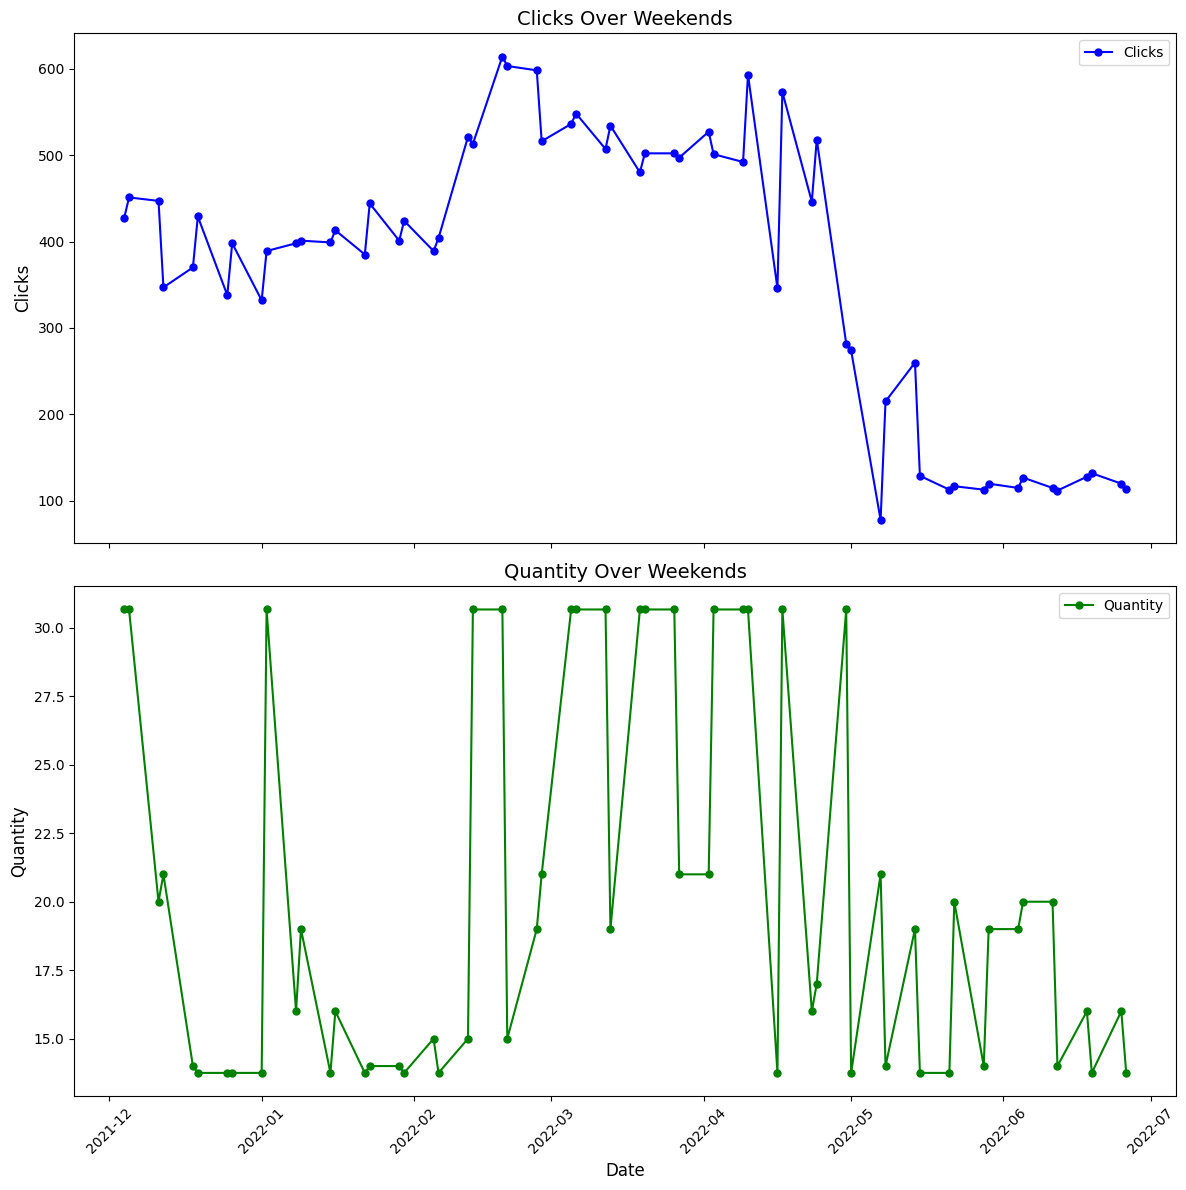

In [432]:
# Filter data for weekends (Weekend column = 1)
weekend_data = final_df[final_df['Weekend'] == 1]

# Group data by 'Day Index' (you can choose other time periods like month or week if preferred)
grouped_data = weekend_data.groupby('Day Index')[['Clicks', 'Quantity']].sum()

# Create subplots for Clicks and Quantity
fig, axs = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# Plot Clicks
axs[0].plot(grouped_data.index, grouped_data['Clicks'], label='Clicks', color='blue', marker='o', linestyle='-', markersize=5)
axs[0].set_title('Clicks Over Weekends', fontsize=14)
axs[0].set_ylabel('Clicks', fontsize=12)
axs[0].legend()

# Plot Quantity
axs[1].plot(grouped_data.index, grouped_data['Quantity'], label='Quantity', color='green', marker='o', linestyle='-', markersize=5)
axs[1].set_title('Quantity Over Weekends', fontsize=14)
axs[1].set_ylabel('Quantity', fontsize=12)
axs[1].legend()

# Add x-label for the bottom plot
axs[1].set_xlabel('Date', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()



## Correlation between clicks and quantity

In [434]:
# Calculate the correlation between clicks and quantity
clicks_quantity_corr = final_df['Clicks'].corr(final_df['Quantity'])

# Calculate the correlation between impressions and quantity
impressions_quantity_corr = final_df['Impressions'].corr(final_df['Quantity'])

print(f"Correlation between clicks and quantity: {clicks_quantity_corr}")
print(f"Correlation between impressions and quantity: {impressions_quantity_corr}")


Correlation between clicks and quantity: 0.4071564995451299
Correlation between impressions and quantity: 0.1335569682473299


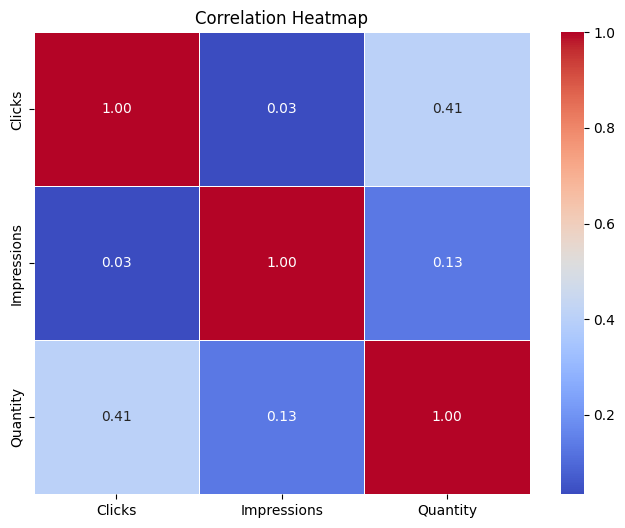

In [435]:
# Computing the correlation matrix
corr_matrix = final_df[['Clicks', 'Impressions', 'Quantity']].corr()

# Creating the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Display the heatmap
plt.title('Correlation Heatmap')
plt.show()
